# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

## [作業目標]
- 試著調整特徵篩選的門檻值, 觀察會有什麼影響效果  

## [作業重點]
- 調整相關係數過濾法的篩選門檻, 看看篩選結果的影響 (In[5]~In[8], Out[5]~Out[8])
- 調整L1 嵌入法篩選門檻, 看看篩選結果的影響 (In[9]~In[11], Out[9]~Out[11])

In [14]:
# 引用函式庫
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [15]:
# 指定路徑與檔名
data_path = './data/Part02/'
df = pd.read_csv(data_path + 'titanic_train.csv')

# 存取目標
train_Y = df['Survived']
df = df.drop(['PassengerId'] , axis=1)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


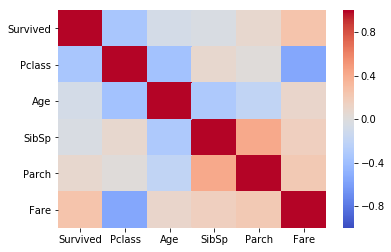

In [16]:
# 計算 df 整體相關係數，並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = df.corr()
sns.heatmap(corr , cmap='coolwarm' , vmax=1 , vmin=-1)
plt.show()

In [17]:
# 去除 Survived 欄位
df = df.drop(['Survived'] , axis=1)

# 取 int64、float64 兩種數值型欄位，並存於 num_features
num_features = []
for dtype,feature in zip(df.dtypes , df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)

print(f'{len(num_features)}\nNumeric Features：{num_features}\n')

5
Numeric Features：['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [18]:
# 削滅文字型欄位，只保留數值型欄位
df = df[num_features]
# 填補缺值
df = df.fillna(-1)

MMEncoder = MinMaxScaler()
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


# 作業1
* 鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?  

In [19]:
# 原始特徵 + 邏輯迴歸
train_X = MMEncoder.fit_transform(df)
estimator = LogisticRegression()
cross_val_score(estimator , train_X , train_Y , cv=5).mean()

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\

0.7038635542329971

In [28]:
# 篩選相關係數1
# 篩選相關係數大於0.1 或小於 -0.1 的特徵
high_list = list(corr[(corr['Survived']>0.1) | (corr['Survived']<-0.1)].index)

print(high_list)

['Survived', 'Pclass', 'Fare']


In [29]:
high_list.pop(0)

print(high_list)

['Pclass', 'Fare']


In [30]:
# 特徵1 + 邏輯迴歸
train_X = MMEncoder.fit_transform( df[high_list] )
cross_val_score(estimator , train_X , train_Y , cv=5).mean()

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\

0.6791567235397566

In [37]:
# 篩選相關係數2
"""
Your Code Here
"""
# 篩選相關係數大於0.3 或小於 -0.3 的特徵
high_list = list(corr[(corr['Survived']>0.3) | (corr['Survived']<-0.3)].index)

print(high_list)

['Survived', 'Pclass']


In [38]:
high_list.pop(0)

print(high_list)

['Pclass']


In [39]:
# 特徵2 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppD

0.6791567235397566

# 作業2
* 續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?

In [40]:
from sklearn.linear_model import Lasso
"""
Your Code Here, select parameter alpha 
"""
L1_Reg = Lasso(alpha=0.001)

train_X = MMEncoder.fit_transform(df)
L1_Reg.fit(train_X, train_Y)
L1_Reg.coef_

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([-0.39684291, -0.25338753, -0.19144856,  0.28161304,  0.28188094])

In [41]:
from itertools import compress
L1_mask = list((L1_Reg.coef_>0) | (L1_Reg.coef_<0))
L1_list = list(compress(list(df), list(L1_mask)))
L1_list

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [42]:
# L1_Embedding 特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df[L1_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\

0.7038635542329971